In [7]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


In [8]:
class Perceptron:
  def __init__(self, input_size, learning_rate = 0.1):
    self.weights = np.zeros(input_size) 
    self.bias = 0
    self.learning_rate = learning_rate
    self.misclassified = []

  def predict_probs(self, x):
    z = np.dot(x, self.weights) + self.bias
    return z
  
  def predict(self,x):
    probs = self.predict_probs(x)
    return np.where(probs>=0,1,-1)

  def fit(self, x_train, y_train, epochs):
    for epoch in range(epochs):
        err = 0
        for i in range(len(x_train)):
          x = x_train[i]           
          y = y_train[i]

          y_pred = self.predict(x)
          error = y - y_pred

          self.weights += self.learning_rate*error*x
          self.bias += self.learning_rate*error

          err+=int(error!=0)
        self.misclassified.append(err)


In [10]:
# Start your main here ,read the iris data set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)
print(df.head())

y = df.iloc[:, 4].values
x = df.iloc[:, 0:3].values


     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


C:\Users\admin\AppData\Local\Temp\ipykernel_15896\1485693556.py:13: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green',


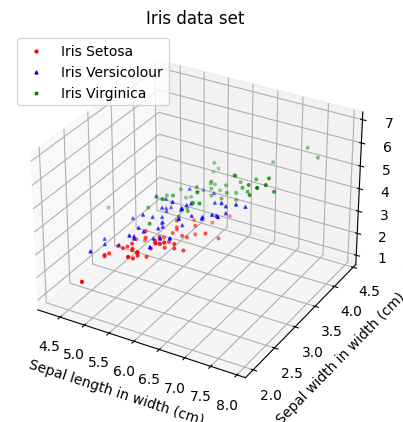

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Iris data set')
ax.set_xlabel("Sepal length in width (cm)")
ax.set_ylabel("Sepal width in width (cm)")
ax.set_zlabel("Petal length in width (cm)")

ax.scatter(x[:50, 0], x[:50, 1], x[:50, 2], color='red',
         marker='o', s=4, edgecolor='red', label="Iris Setosa")
ax.scatter(x[50:100, 0], x[50:100, 1], x[50:100, 2], color='blue',
         marker='^', s=4, edgecolor='blue', label="Iris Versicolour")
ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green',
         marker='x', s=4, edgecolor='green', label="Iris Virginica")
plt.legend(loc='upper left')
plt.show()


In [12]:
x = x[0:100, 0:2] 
y = y[0:100]

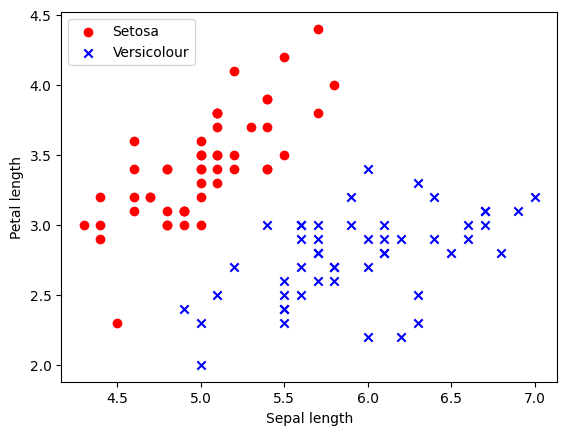

In [14]:
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x',
          label='Versicolour')
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc='upper left')
plt.show()

In [15]:
y = np.where(y == 'Iris-setosa', 1, -1)
x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

classifier = Perceptron(x_train.shape[1], learning_rate=0.01)
classifier.fit(x_train, y_train, epochs=10)
print("accuracy", accuracy_score(classifier.predict(x_test), y_test)*100)

accuracy 100.0


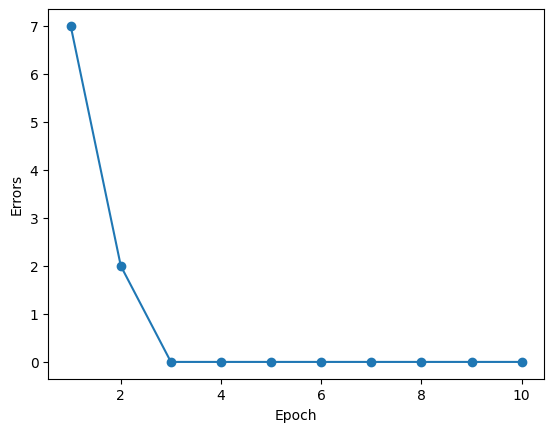

In [20]:
plt.plot(range(1, len(classifier.misclassified) + 1),classifier.misclassified, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()